In [213]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [215]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/first inten project.csv')

In [216]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors = 'coerce')
df['date of reservation'].isnull().sum()

np.int64(37)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36285 non-null  object        
 1   number of adults          36285 non-null  int64         
 2   number of children        36285 non-null  int64         
 3   number of weekend nights  36285 non-null  int64         
 4   number of week nights     36285 non-null  int64         
 5   type of meal              36285 non-null  object        
 6   car parking space         36285 non-null  int64         
 7   room type                 36285 non-null  object        
 8   lead time                 36285 non-null  int64         
 9   market segment type       36285 non-null  object        
 10  repeated                  36285 non-null  int64         
 11  P-C                       36285 non-null  int64         
 12  P-not-C           

In [218]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,date of reservation
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36248
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733,2018-05-24 15:28:31.410284544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-10-02 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262,NaN


In [219]:
df_sorted = df.sort_values(by = 'date of reservation')
df_sorted.drop('Booking_ID', axis = 1, inplace = True)
df_sorted.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.0,0,2015-10-02,Not_Canceled
5,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.0,1,2016-09-13,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.0,1,2017-05-20,Canceled
5455,2,0,0,4,Meal Plan 1,0,Room_Type 1,88,Online,0,0,0,76.5,1,2017-07-01,Canceled
13727,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,Offline,0,0,0,101.5,0,2017-07-01,Canceled


In [220]:
df_sorted['type of meal'].unique()

array(['Meal Plan 1', 'Meal Plan 2', 'Not Selected', 'Meal Plan 3'],
      dtype=object)

In [221]:
df_sorted['type of meal'] = df_sorted['type of meal'].str.replace("Meal Plan ", "")
df_sorted['type of meal'] = df_sorted['type of meal'].str.replace("Not Selected", "0")
df_sorted['type of meal'] = df_sorted['type of meal'].astype(int)
df_sorted['type of meal'].unique()

array([1, 2, 0, 3])

In [222]:
df_sorted['room type'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 5',
       'Room_Type 6', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [223]:
df_sorted['room type'] = df_sorted['room type'].str.replace("Room_Type ", "")
df_sorted['room type'] = df_sorted['room type'].astype(int)
df_sorted['room type'].unique()

array([1, 4, 2, 5, 6, 7, 3])

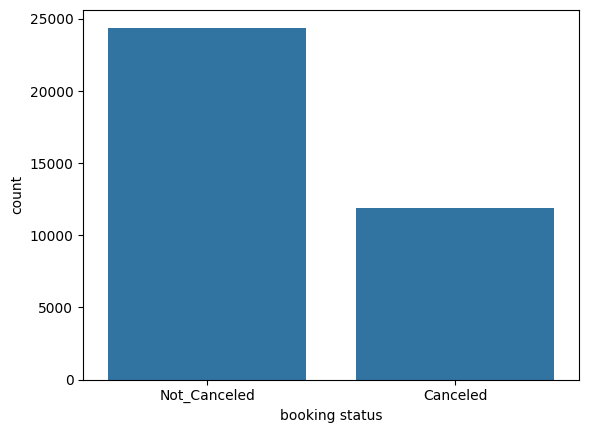

In [224]:
sns.countplot(data = df_sorted, x = 'booking status')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Label Count Plot')
plt.show()

In [225]:
df_sorted['booking status'] = df_sorted['booking status'].str.replace("Not_Canceled", "0")
df_sorted['booking status'] = df_sorted['booking status'].str.replace("Canceled", "1")
df_sorted['booking status'] = df_sorted['booking status'].astype(int)
df_sorted['booking status'].unique()

array([0, 1])

In [226]:
df_sorted['num_of_individuals'] = df_sorted['number of adults'] + df_sorted['number of children']
df_sorted['num_of_individuals'].head()

,num_of_individuals
0,2
5,1
3,1
5455,2
13727,2


In [227]:
df_sorted['month'] = df_sorted['date of reservation'].dt.month_name()
df_sorted['month'].head()

,month
0,October
5,September
3,May
5455,July
13727,July


In [228]:
df_sorted.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'date of reservation',
       'booking status', 'num_of_individuals', 'month'],
      dtype='object')

In [229]:
monthly_counts = df_sorted.groupby(['month', 'booking status']).size().reset_index(name = 'count')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

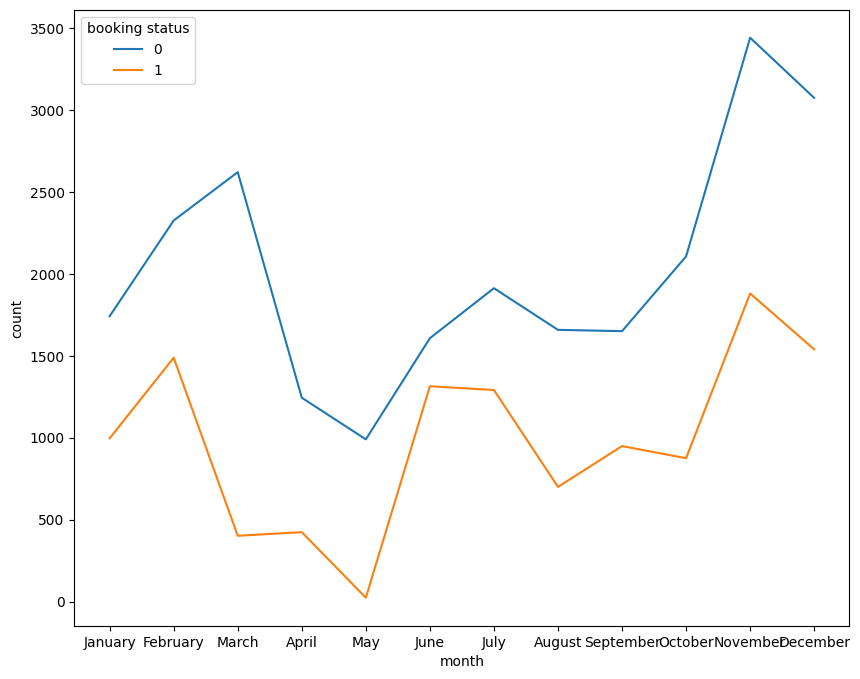

In [230]:
plt.figure(figsize = (10, 8))
sns.lineplot(data = monthly_counts, x = 'month', y = 'count', hue = 'booking status')
plt.xticks(ticks = range(12), labels = month_order)
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Label Line Plot')
plt.show()

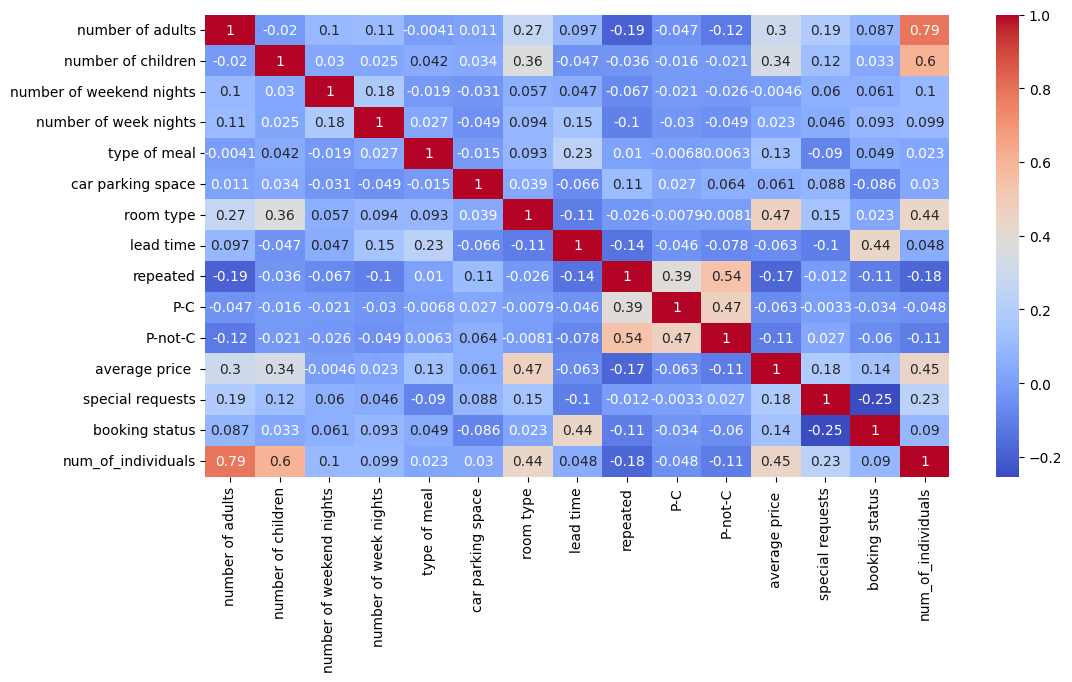

In [231]:
plt.figure(figsize = (12, 6))
sns.heatmap(df_sorted.corr(numeric_only  = True), annot = True, cmap = 'coolwarm')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Heat Map')
plt.show()

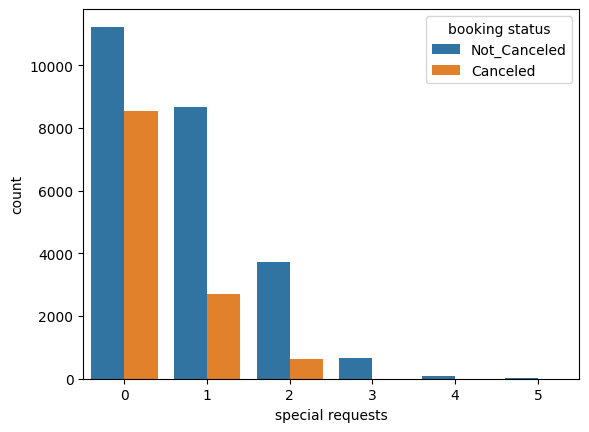

In [232]:
sns.countplot(data = df_sorted, x = 'special requests', hue = df['booking status'])
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Special Request and Label Count Plot')
plt.show()

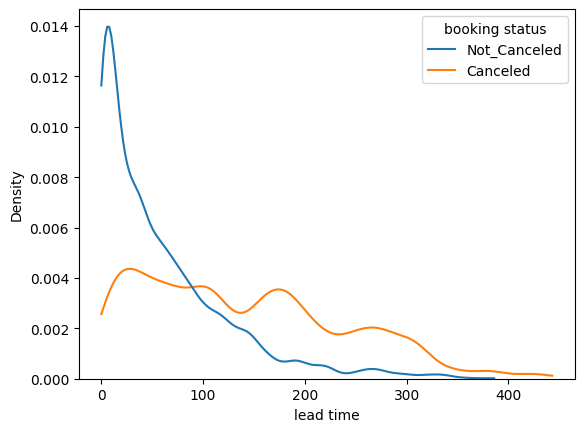

In [233]:
sns.kdeplot(data = df_sorted, x = 'lead time', hue = df['booking status'], cut = 0, common_norm = False)
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Lead Time and Label KDE')
plt.show()

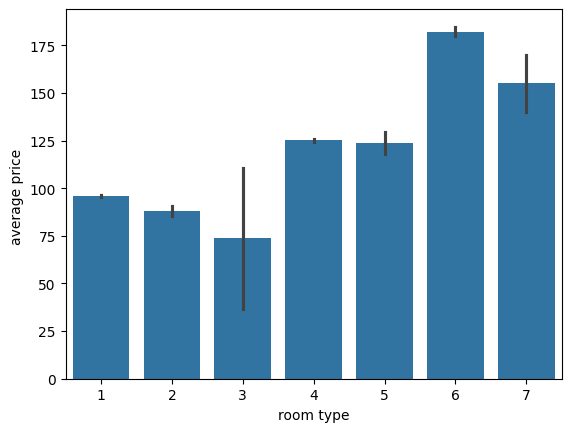

In [234]:
sns.barplot(data = df_sorted, x = 'room type', y = 'average price ')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Average Price and Room Type Bar Plot')
plt.show()

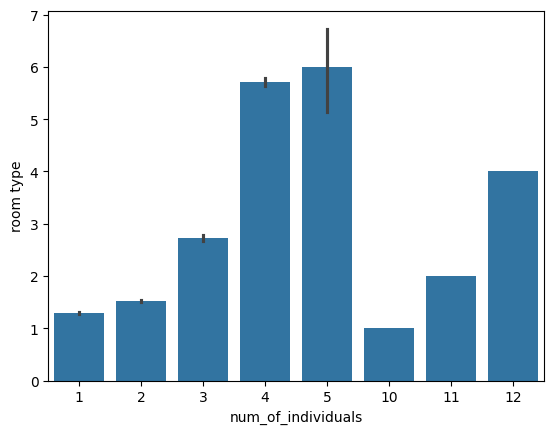

In [235]:
sns.barplot(data = df_sorted, x = 'num_of_individuals', y = 'room type')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Number of Individuals and Room Type Bar Plot')
plt.show()

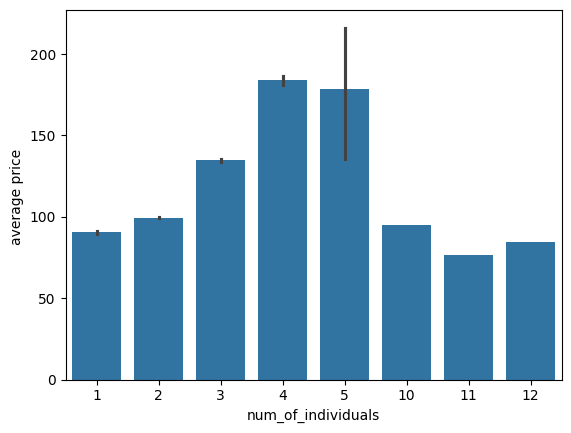

In [236]:
sns.barplot(data = df_sorted, x = 'num_of_individuals', y = 'average price ')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Bar Plot for Average Price and Number of Individuals')
plt.show()

In [237]:
pd.crosstab(df_sorted['num_of_individuals'], df_sorted['room type'])

room type,1,2,3,4,5,6,7
num_of_individuals,,,,,,,
1,6851,18,3,556,98,16,14
2,19537,598,4,3573,117,73,44
3,1730,27,0,1914,36,117,29
4,19,46,0,15,14,755,63
5,0,2,0,0,0,5,8
10,1,0,0,0,0,0,0
11,0,1,0,0,0,0,0
12,0,0,0,1,0,0,0


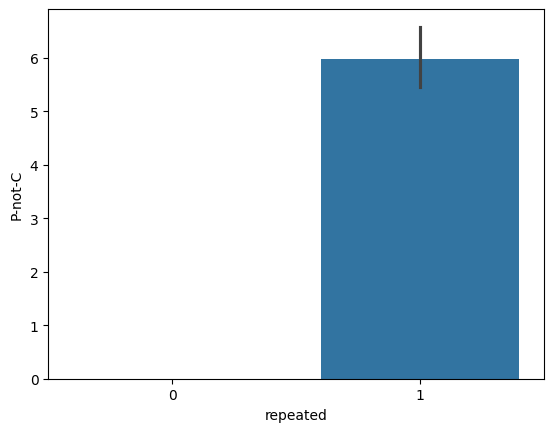

In [238]:
sns.barplot(data = df_sorted, x = 'repeated', y = 'P-not-C')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/P-C and Repeated Bar Plot')
plt.show()

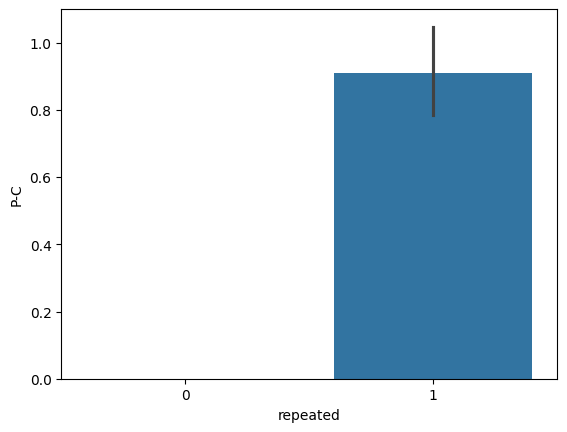

In [239]:
sns.barplot(data = df_sorted, x = 'repeated', y = 'P-C')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/P-not-C and Repeated Bar Plot')
plt.show()

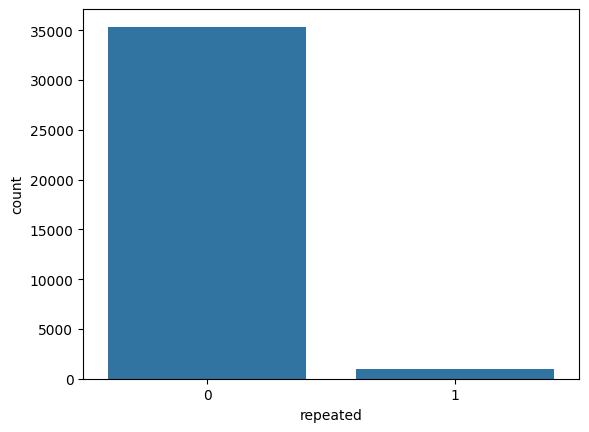

In [240]:
sns.countplot(data = df_sorted, x = 'repeated')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Repeated Count Plot')
plt.show()

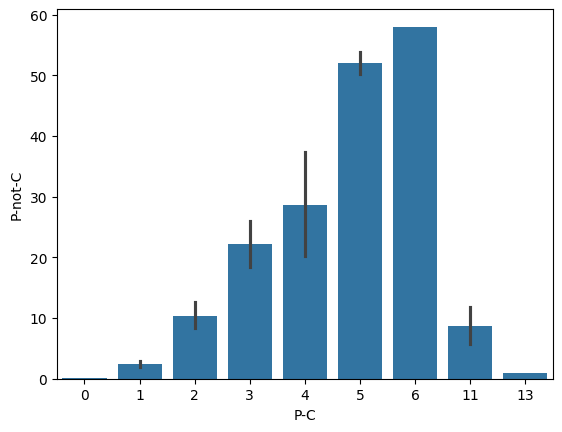

In [241]:
sns.barplot(data = df_sorted, x = 'P-C', y = 'P-not-C')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/P-C and P-not-C Bar Plot')
plt.show()

In [242]:
# pd.crosstab(df_sorted['special requests'], df['booking status'])

In [243]:
pd.crosstab(df_sorted['market segment type'], df['booking status'])

booking status,Canceled,Not_Canceled
market segment type,,
Aviation,37,88
Complementary,0,391
Corporate,220,1797
Offline,3154,7377
Online,8478,14743


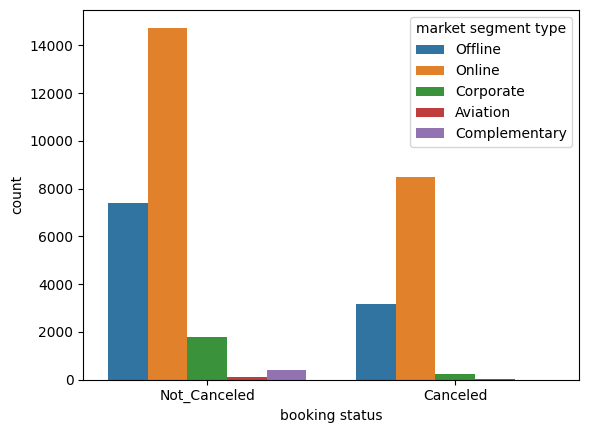

In [244]:
sns.countplot(data = df_sorted, x = df['booking status'], hue = 'market segment type')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Market Segment Type and Label Count Plot')
plt.show()